In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# output path 
out_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\hc_video_output\MM_HC_test_distance\09-12-2024\000_raw_pose_data'

# import yolo 
yolo_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_velocity_01302025\hc_video_output\MM_HC_test_distance\09-12-2024\000_raw_pose_data\2024_09_12_02_41_PWS_1_gait_vertical_left_yolo.csv'

In [3]:
yolo_df = pd.read_csv(yolo_path, index_col = 0)
yolo_df.head()

,X,Y,label,frame
0,0.0,0.0,nose,0
1,0.0,0.0,left_eye,0
2,0.0,0.0,right_eye,0
3,0.0,0.0,left_ear,0
4,0.0,0.0,right_ear,0


In [4]:
yolo_df['label'].value_counts()

label
nose              613
left_wrist        613
left_ankle        613
right_knee        613
left_knee         613
right_hip         613
left_hip          613
right_wrist       613
right_elbow       613
left_eye          613
left_elbow        613
right_shoulder    613
left_shoulder     613
right_ear         613
left_ear          613
right_eye         613
right_ankle       613
Name: count, dtype: int64

In [12]:
# pixel height 

l_eye_yolo_df = yolo_df.loc[yolo_df['label'] == 'left_eye']
l_eye_yolo_df.set_index('frame', inplace=True)
l_ankle_yolo_df = yolo_df.loc[yolo_df['label'] == 'left_ankle']
l_ankle_yolo_df.set_index('frame', inplace=True)
l_eye_yolo_df.head()

l_ankle_yolo_df = l_ankle_yolo_df.copy()
l_ankle_yolo_df.loc[:, 'approx_height_Y_pix'] = abs(l_eye_yolo_df['Y'] - l_ankle_yolo_df['Y'])
l_ankle_yolo_df.loc[:, 'approx_height_Y_pix_smooth'] = l_ankle_yolo_df['approx_height_Y_pix'].rolling(window=20, min_periods = 1).mean()

<Axes: xlabel='frame', ylabel='approx_height_Y_pix'>

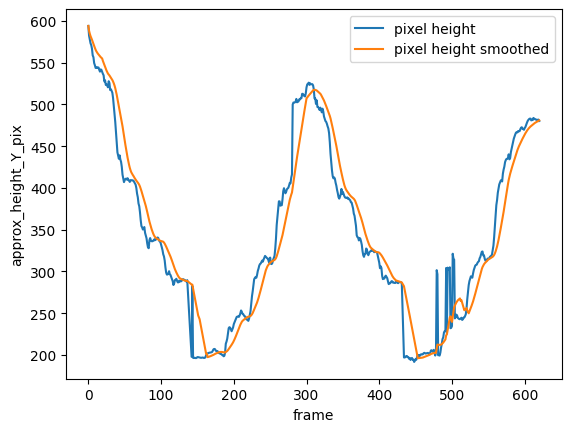

In [13]:
max_frame = yolo_df['frame'].max()

sns.lineplot(x = 'frame', y = 'approx_height_Y_pix', data = l_ankle_yolo_df, label = 'pixel height')
sns.lineplot(x = 'frame', y = 'approx_height_Y_pix_smooth', data = l_ankle_yolo_df, label = 'pixel height smoothed')

In [ ]:
# pixels per inch 